Importing Necessary Modules

In [2]:
from IPython.display import display
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

Creating the Qubits and Classical bits.

In [3]:
q_state = QuantumRegister(1)

e_A = QuantumRegister(1)
e_B = QuantumRegister(1)

a = ClassicalRegister(1)
b = ClassicalRegister(1)

qc = QuantumCircuit(q_state, e_A, e_B, a, b)

Initializing the ebit e_A and e_B as the Phi+ Bell State

In [4]:
qc.h(e_A)
qc.cx(e_A, e_B)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q1'), 0), Qubit(QuantumRegister(1, 'q2'), 0), Qubit(QuantumRegister(1, 'q3'), 0)), clbits=())

Adding gates to create the Teleportation Protocol

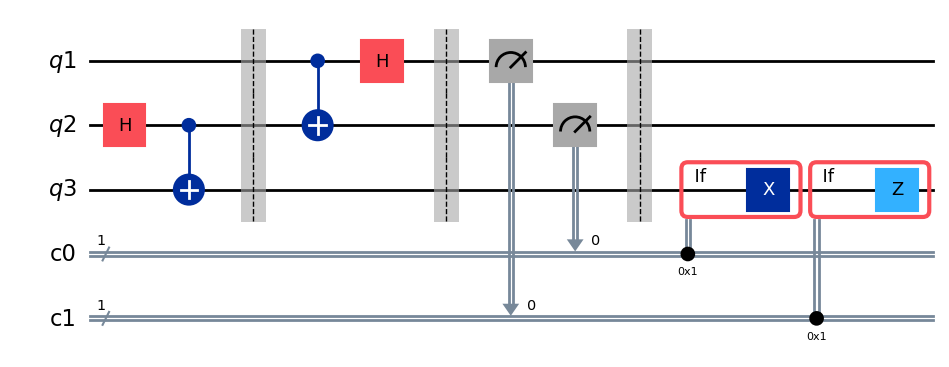

In [5]:
qc.cx(q_state, e_A)
qc.h(q_state)
qc.barrier()

qc.measure(q_state, b)
qc.measure(e_A, a)
qc.barrier()

with qc.if_test((a, 1)):
    qc.x(e_B)
with qc.if_test((b, 1)):
    qc.z(e_B)

display(qc.draw(output = 'mpl'))

Testing the quantum circuit with q_state initialized as |0> and |1>

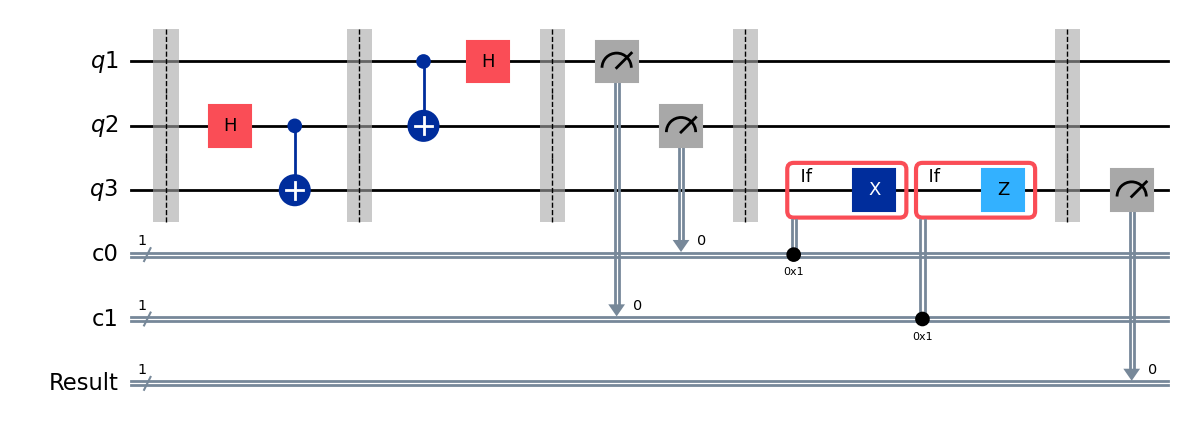

In [6]:
test1 = QuantumCircuit(q_state, e_A, e_B, a, b)
#test1.x(q_state)
test1.barrier()
test1 = test1.compose(qc)
test1.barrier()

result = ClassicalRegister(1, "Result")
test1.add_register(result)
test1.measure(e_B, result)

display(test1.draw(output='mpl'))

Measurement Statistics

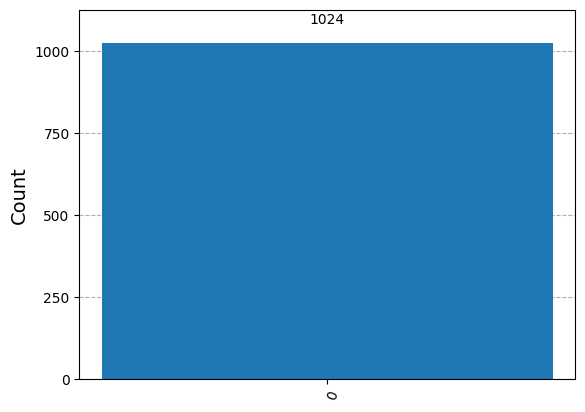

In [7]:
result = AerSimulator().run(test1).result()
statistics = result.get_counts()
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

Testing the quantum circuit with random states

In [8]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.54681055+0.j        ,  0.60271273+0.58115023j],
       [ 0.02675792-0.83682868j,  0.39193429-0.38129947j]])

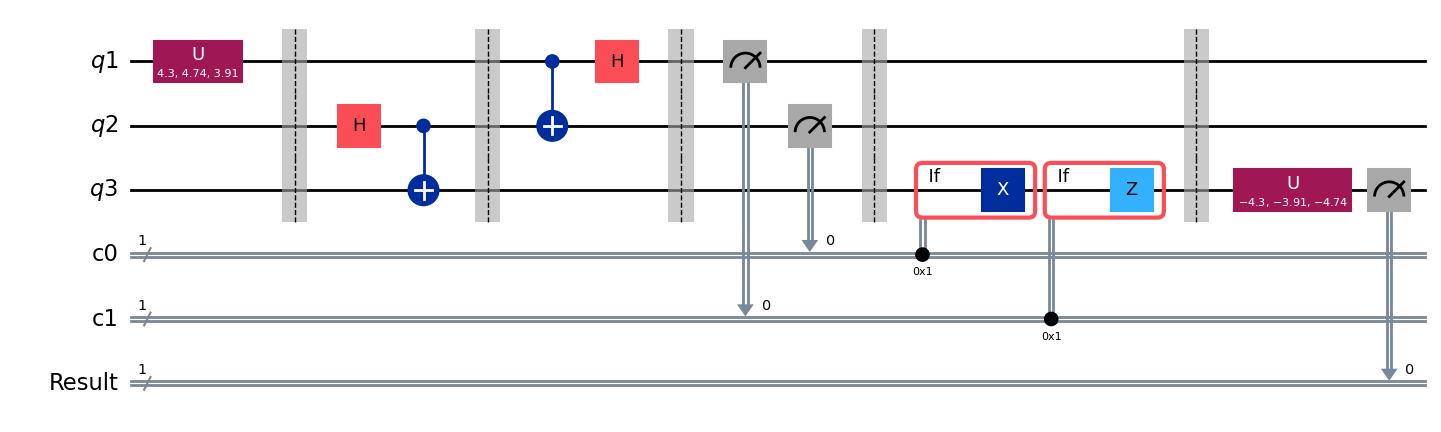

In [9]:
test2 = QuantumCircuit(q_state, e_A, e_B, a, b)
test2.append(random_gate, q_state)
test2.barrier()

test2 = test2.compose(qc)
test2.barrier()
test2.append(random_gate.inverse(), e_B)

result = ClassicalRegister(1, "Result")
test2.add_register(result) 
test2.measure(e_B, result)

display(test2.draw(output='mpl'))

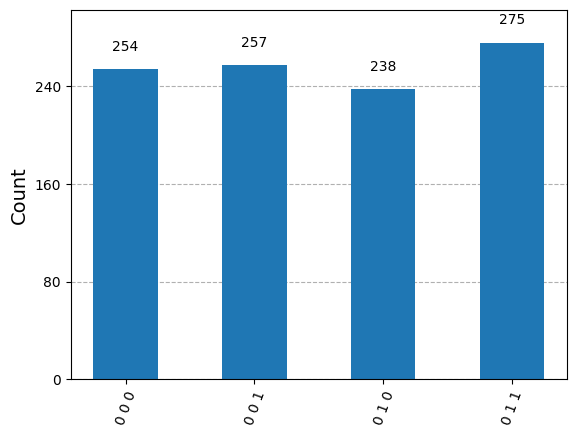

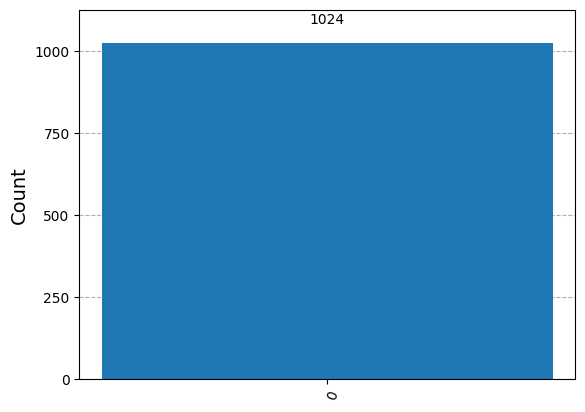

In [10]:
result_ = AerSimulator().run(test2).result()
statistics = result_.get_counts()
display(plot_histogram(statistics))
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))